In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# structure of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.rename({'Genre':'Gender'}, axis=1, inplace=True )

In [12]:
# column names
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
# brief statistical summary of the numerical columns
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
# distribution of the customers according to gender

def bar_gender(df, var):
    
    count = df.groupby(var)[var].count()

    data_frame = pd.DataFrame({var: count.index, 'Count': count.values})

    plt.figure(figsize=(15,10))

    sns.barplot(x = var, y = 'Count', data = data_frame, hue = var)

    plt.xticks(fontsize = 18) # changing the size values on x column
    # labeling the graph
    plt.xlabel(var, fontsize = 20); plt.ylabel('Count', fontsize = 20)
    # labelling the graph
    plt.title("Customers Gender Comparison", fontsize = 22)
    # display the chart
    plt.show()
    
    return 

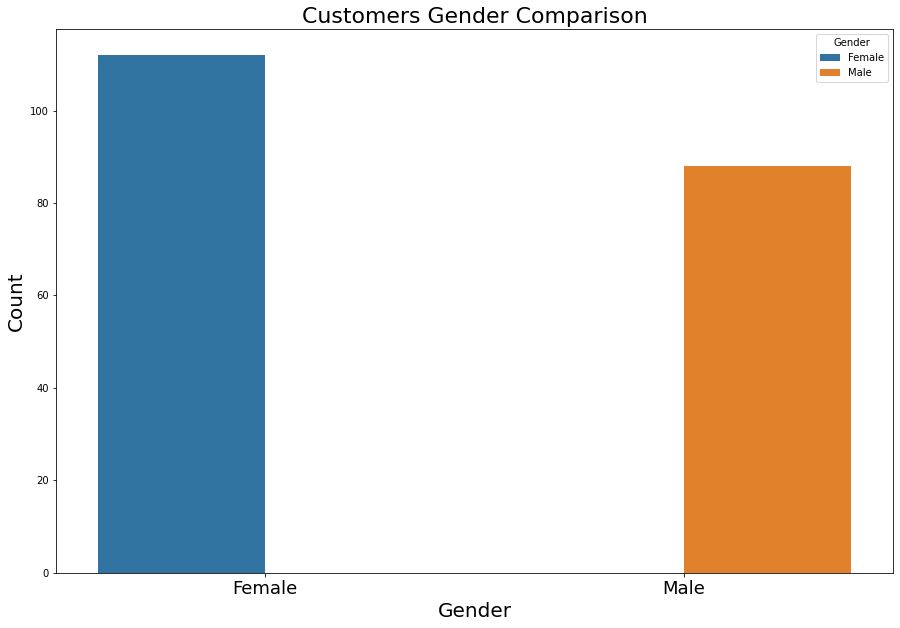

In [31]:
bar_gender(df, 'Gender')